In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [51]:
df=pd.read_csv('/content/drive/MyDrive/ML Course/data.csv',encoding='unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df.head()
df.shape

(435742, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

## Checking for Null values

In [39]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
so2,401096.0,10.829414,11.177187,0.0,5.0,8.0,13.7,909.000000
no2,419509.0,25.809623,18.503086,0.0,14.0,22.0,32.2,876.000000
rspm,395520.0,108.832784,74.872430,0.0,56.0,90.0,142.0,6307.033333
spm,198355.0,220.783480,151.395457,0.0,111.0,187.0,296.0,3380.000000
pm2_5,9314.0,40.791467,30.832525,3.0,24.0,32.0,46.0,504.000000


In [41]:
df.nunique() #unique values in each column

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

##Data Visualization

[]

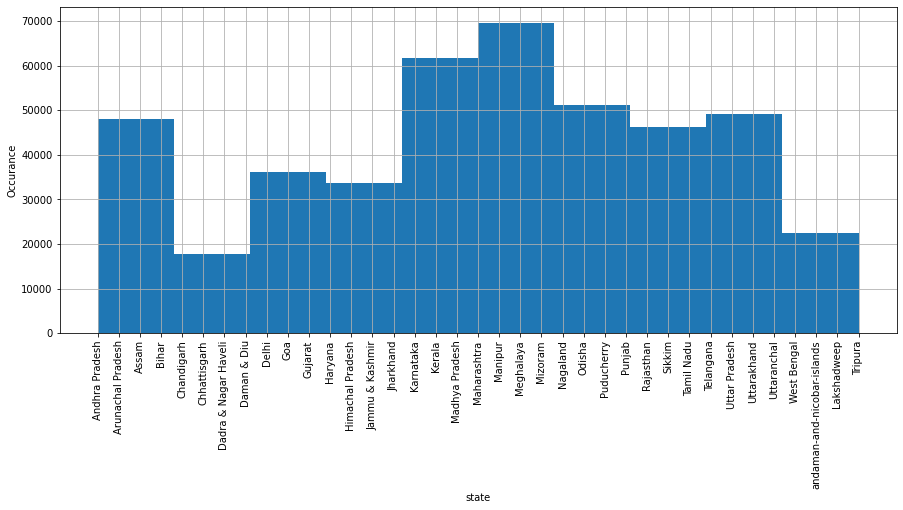

In [42]:
plt.figure(figsize=(15, 6)) #increasing figure size because default None is too small
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Occurance')
plt.plot()

[]

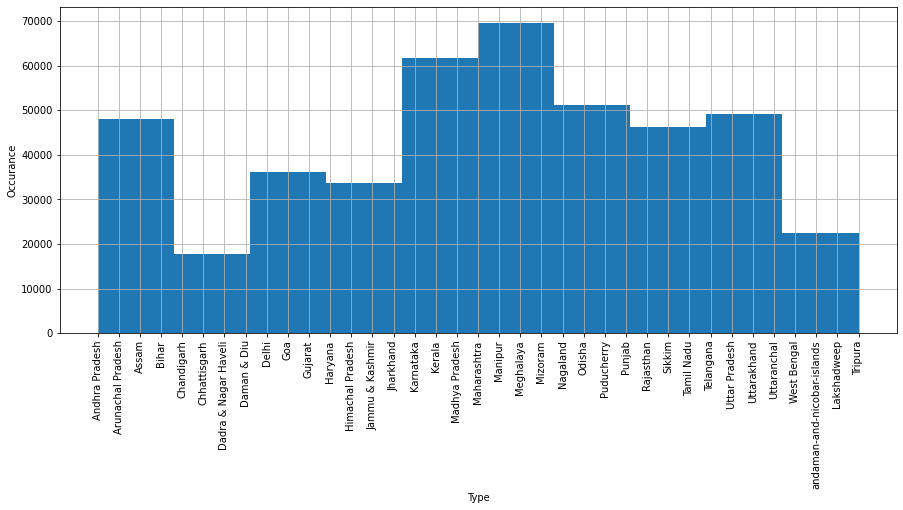

In [43]:
plt.figure(figsize=(15,6)) #increasing figure size because default None is too small
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('Type')
plt.ylabel('Occurance')
plt.plot()

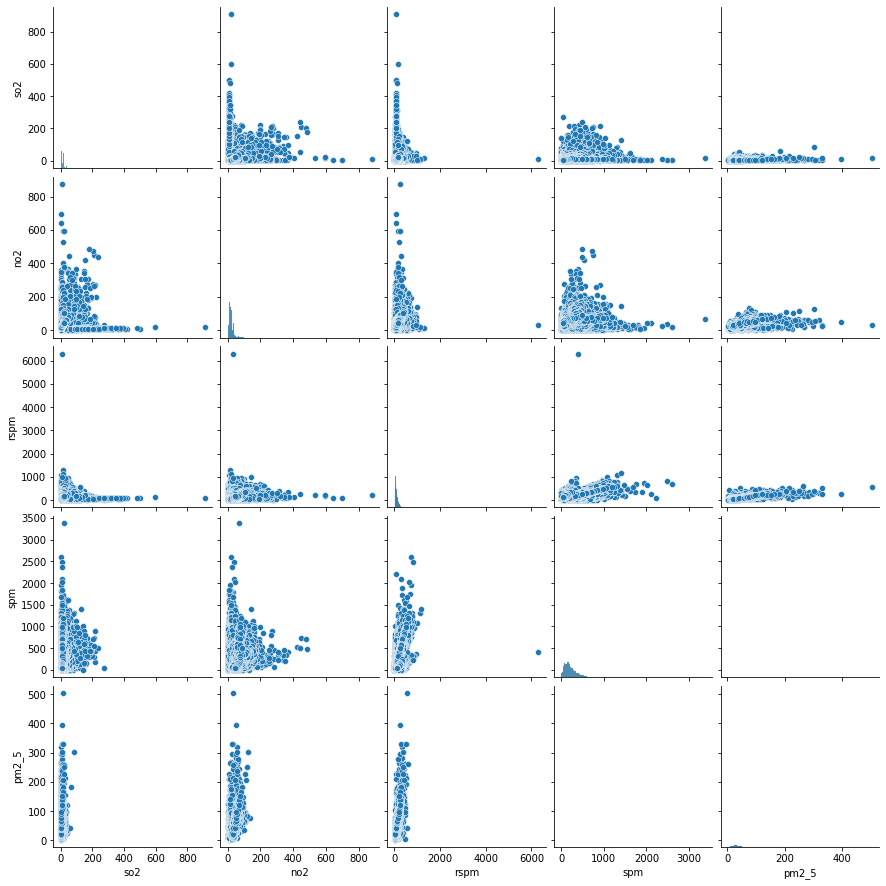

In [44]:
sns.pairplot(data=df)

#Checking Null values

In [45]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

In [47]:
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df['location'].isnull().sort_values(ascending=False)

#locating NaN columns for location column

435741     True
435739     True
435740     True
1         False
145239    False
          ...  
290497    False
290498    False
290499    False
290500    False
0         False
Name: location, Length: 435742, dtype: bool

In [75]:
df.iloc[435739:]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.drop(['location'],axis=1,inplace=True)
#droping rows with no valuable datas

In [77]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
state                               0
dtype: int64

In [78]:
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [79]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
date                                7
sampling_date                       3
type                                0
state                               0
dtype: int64

##Dropping Unneccesary Columns

In [82]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

KeyError: ignored

In [86]:
df.columns

Index(['state', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5'], dtype='object')

In [87]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
type          0
state         0
dtype: int64

In [94]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [98]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues #no Null values are present

Rpi      0
Noi      0
SOi      0
pm2_5    0
spm      0
rspm     0
no2      0
so2      0
type     0
state    0
dtype: int64

##Calculating for pollutant index from above data

In [95]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si

def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni

df['SOi']=df['so2'].apply(cal_SOi) # calculating the individual pollutant index for so2(sulphur dioxide)
df['Noi']=df['no2'].apply(cal_Noi) # calculating the individual pollutant index for no2(nitrogen dioxide)
data= df[['so2','SOi','no2','Noi']]
data.head()



,so2,SOi,no2,Noi
0,4.8,6.000,17.4,21.750
1,3.1,3.875,7.0,8.750
2,6.2,7.750,28.5,35.625
3,6.3,7.875,14.7,18.375
4,4.7,5.875,7.5,9.375


In [96]:
df.columns

Index(['state', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'SOi', 'Noi',
       'Rpi'],
      dtype='object')

In [100]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi



# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)
df['Rpi']=df['rspm'].apply(cal_RSPMI)
# calculating the individual pollutant index for spm(suspended particulate matter)
df['SPMi']=df['spm'].apply(cal_SPMi)

data= df[['rspm','Rpi', 'spm','SPMi']]
data.sample(5)


,rspm,Rpi,spm,SPMi
179991,89.0,0.0,70.0,70.000000
393270,165.0,0.0,0.0,0.000000
213499,84.0,0.0,138.0,125.333333
285181,98.0,0.0,0.0,0.000000
88689,98.0,0.0,182.0,154.666667


In [102]:
df.columns

Index(['state', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'SOi', 'Noi',
       'Rpi', 'SPMi'],
      dtype='object')

##Calculate Air quality index

In [105]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)


def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)



In [106]:
df.sample(10)

,state,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
318110,Rajasthan,"Residential, Rural and other Areas",3.7,34.2,0.0,463.0,0.0,4.625,42.750,0.0,407.674419,407.674419,Hazardous
22433,Andhra Pradesh,Industrial Area,15.0,25.0,70.0,0.0,0.0,18.750,31.250,0.0,0.000000,31.250000,Good
316226,Punjab,"Residential, Rural and other Areas",6.0,15.0,114.0,0.0,0.0,7.500,18.750,0.0,0.000000,18.750000,Good
158806,Kerala,Residential and others,7.2,25.3,53.0,74.0,0.0,9.000,31.625,0.0,74.000000,74.000000,Moderate
167976,Kerala,Industrial Area,2.0,8.0,31.0,0.0,0.0,2.500,10.000,0.0,0.000000,10.000000,Good
31711,Assam,Residential and others,7.3,14.0,117.0,153.0,0.0,9.125,17.500,0.0,135.333333,135.333333,Poor
409312,Uttar Pradesh,Industrial Area,23.0,24.0,182.0,0.0,0.0,28.750,30.000,0.0,0.000000,30.000000,Good
90291,Gujarat,Residential and others,15.7,22.4,79.0,158.0,0.0,19.625,28.000,0.0,138.666667,138.666667,Poor
255903,Maharashtra,"Residential, Rural and other Areas",47.0,90.0,166.0,0.0,0.0,58.750,110.000,0.0,0.000000,110.000000,Poor
117846,Himachal Pradesh,"Residential, Rural and other Areas",4.0,15.0,39.0,0.0,0.0,5.000,18.750,0.0,0.000000,18.750000,Good


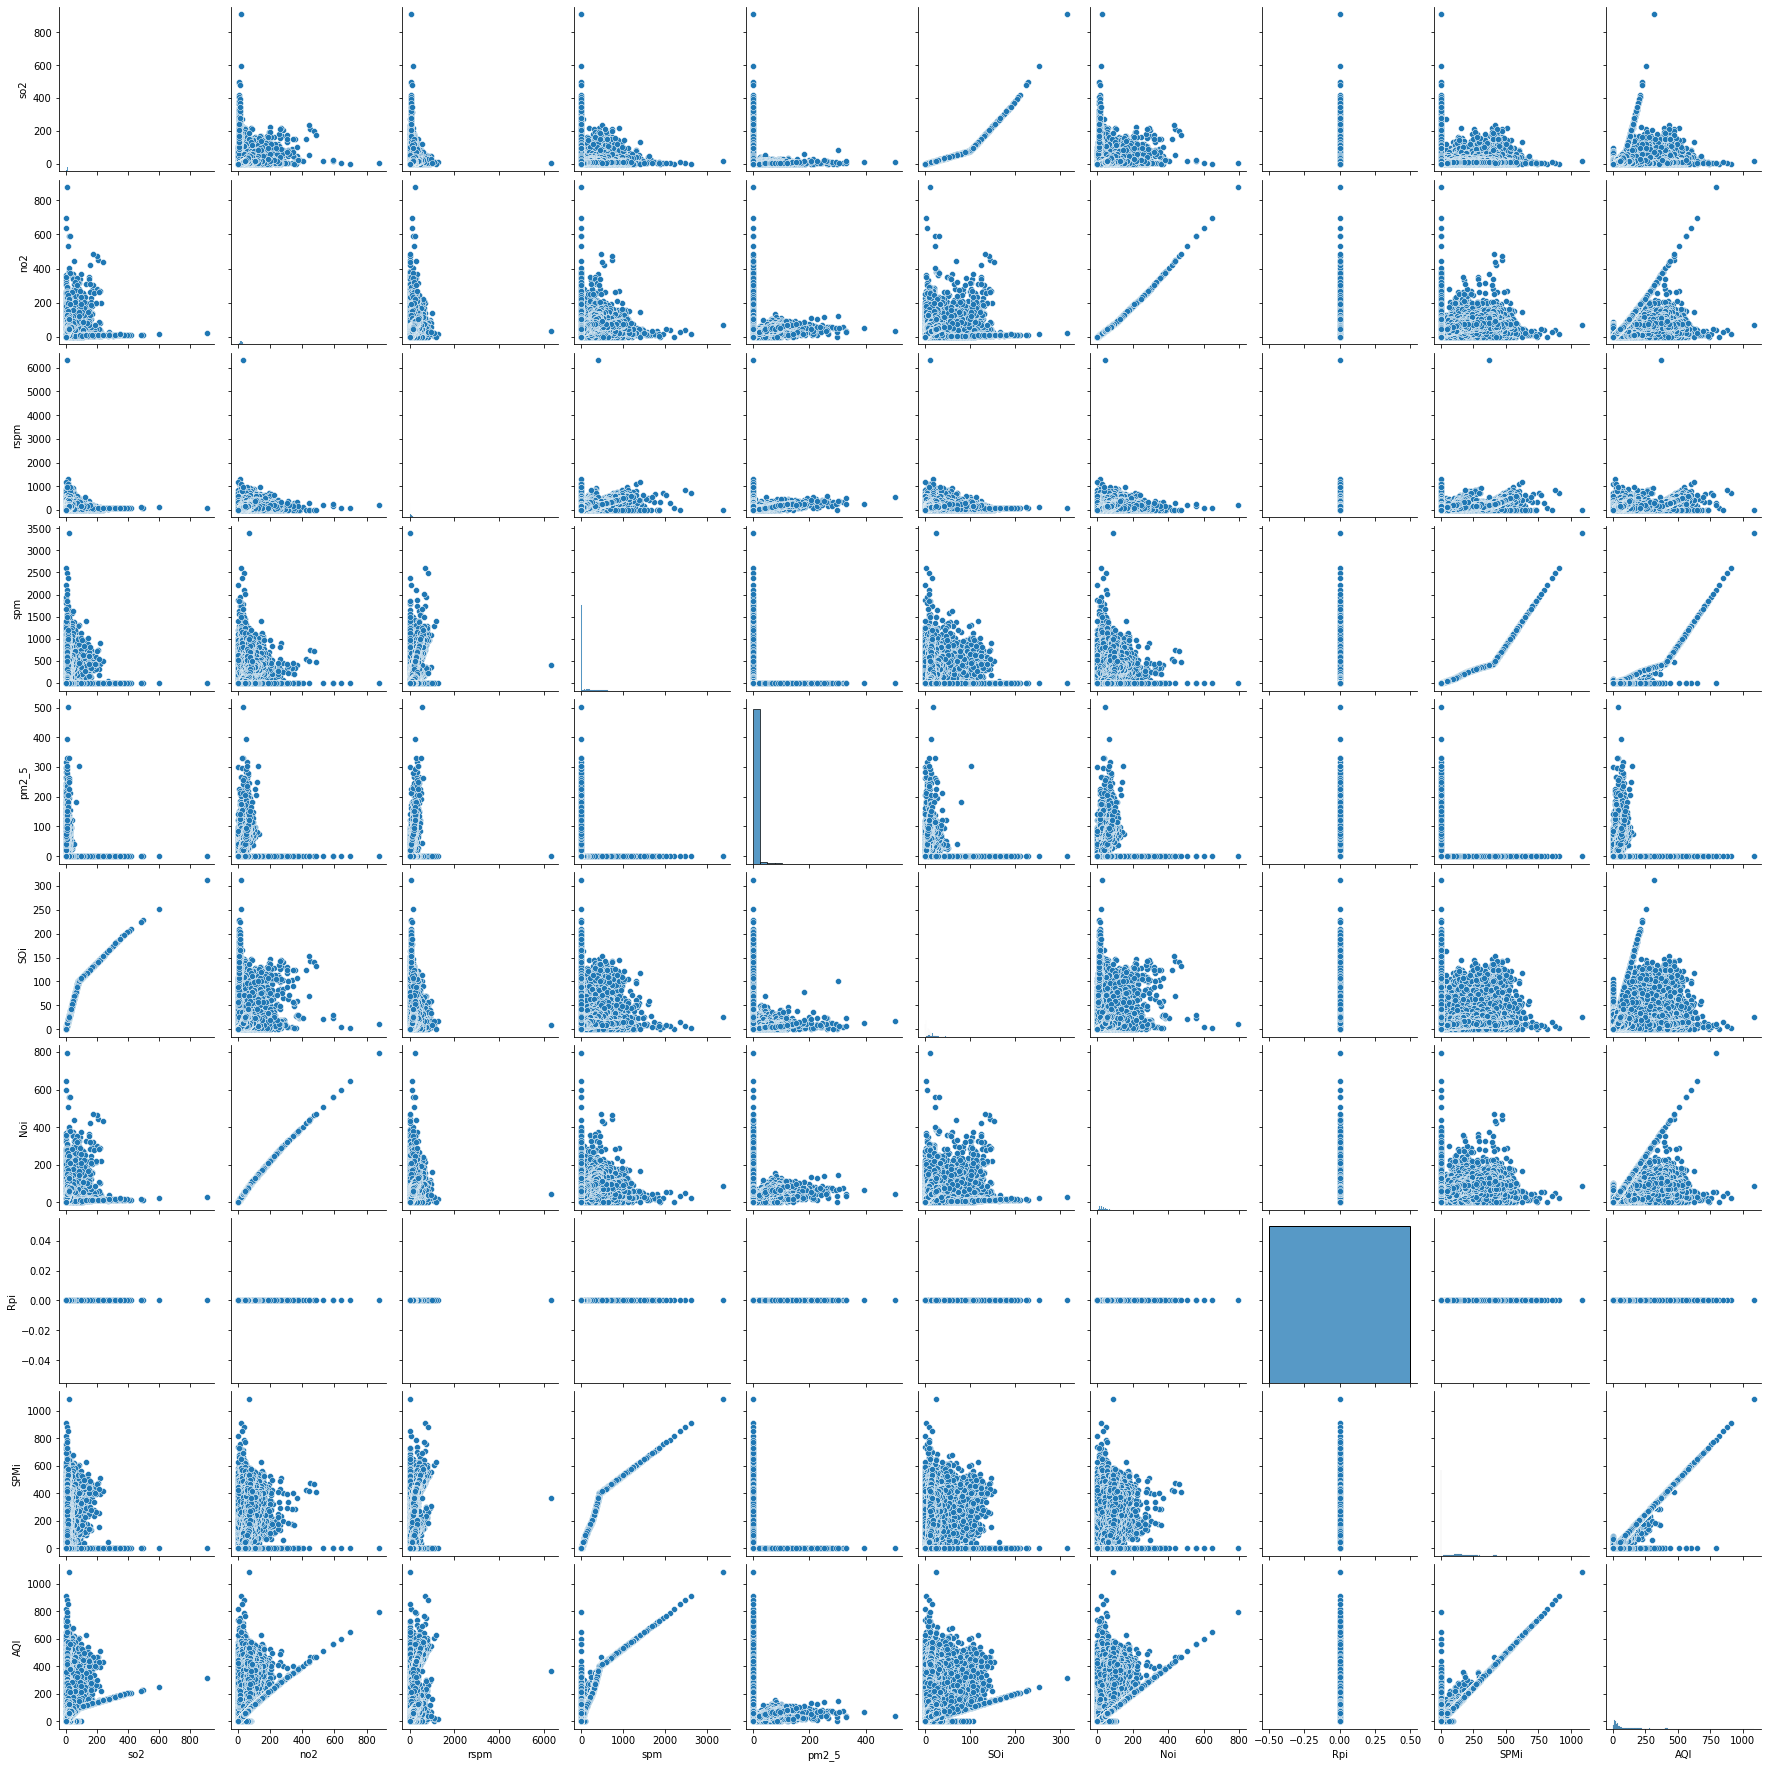

In [107]:
sns.pairplot(data=df)

##Splitting dataset into test and train

In [108]:

X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()


,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [109]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(305019, 4) (130723, 4) (305019,) (130723,)


##Linear Regression

In [112]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [116]:


RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('\n\n')
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  13.599461131642782
RMSE TestData =  13.605742102602772



RSquared value on train: 0.9849285243868945
RSquared value on test: 0.9848613532816977
